In [1]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t
import numpy as np
import moyra as ma
import sys, os

me.mechanics_printing()

In [2]:
DoFs = 6

# heave and fold angle as degrres of freedom
p = ma.DynamicModelParameters(DoFs)

## pendulum mass
p.m = ma.ModelSymbol(value = 0.3,string = 'm')
p.I_xx = ma.ModelSymbol(value = 0.3,string = 'I_xx')
p.I_yy = ma.ModelSymbol(value = 0.3,string = 'I_yy')
p.I_zz = ma.ModelSymbol(value = 0.3,string = 'I_zz')
p.I_xy = ma.ModelSymbol(value = 0.3,string = 'I_xy')
p.I_xz = ma.ModelSymbol(value = 0.3,string = 'I_xz')
p.I_yz = ma.ModelSymbol(value = 0.3,string = 'I_yz')

#gravity vector
p.g  = ma.ModelSymbol(value = 9.81,string = 'g')                     # gravity
p.g_v = ma.ModelMatrix(value =[0,0,-1],length=3,string='g_v') # The stationary point

In [3]:
# body_frame= ma.HomogenousTransform().Translate(*p.q[:3]).R_x(p.q[3]).R_y(p.q[4]).R_z(p.q[5])
body_frame= ma.frames.ReferenceFrame.EulerAnglesXYZ(sym.Matrix(p.q[:3]),sym.Matrix(p.q[3:6]))
#Create Elemnts
M = ma.elements.MassMatrix(p.m,p.I_xx,p.I_yy,p.I_zz,p.I_xy,p.I_xz,p.I_yz)
body = ma.elements.RigidElement(p.q,body_frame,M,grav_vec = p.g*p.g_v)

In [4]:
# %%timeit -r 1 -n 1
# %%prun -D "C:\Users\qe19391\OneDrive - University of Bristol\Desktop\dump2.prof"
sm = ma.SymbolicModel.FromElementsAndForces(p.q,body)
sm = sm.subs({p.g_v[0]:0,p.g_v[1]:0,p.g_v[2]:-1})

Generating EoM for Element 0 out of 1 - default:RigidElement


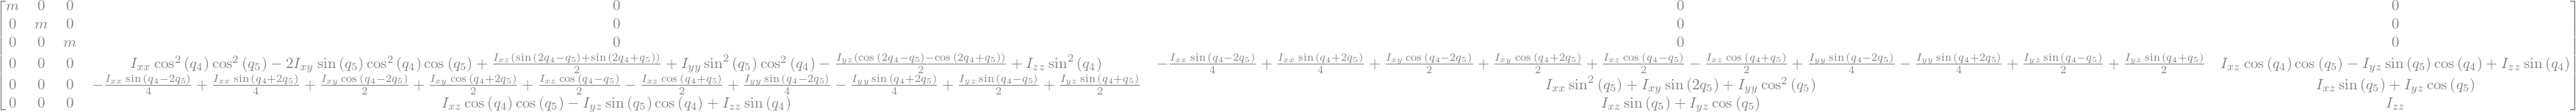

In [5]:
sym.simplify(sm.M)

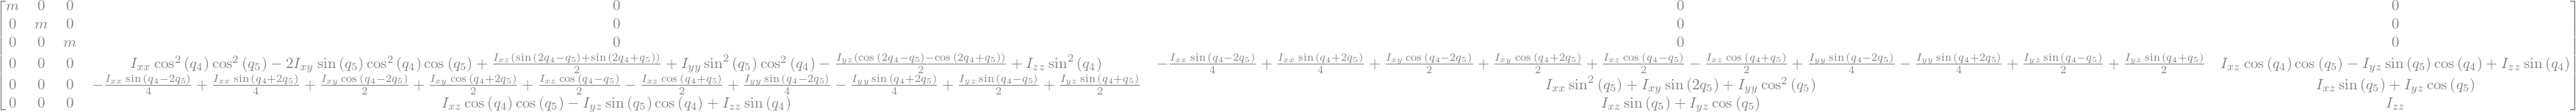

In [6]:
sym.simplify(sm.M)

In [7]:
body_frame2= ma.frames.HomogenousFrame().Translate(*p.q[:3]).R_x(p.q[3]).R_y(p.q[4]).R_z(p.q[5])
# body_frame= ma.HomogenousShaba.EulerAnglesXYZ(sym.Matrix(p.q[:3]),sym.Matrix(p.q[3:6]))
#Create Elemnts
M = ma.elements.MassMatrix(p.m,p.I_xx,p.I_yy,p.I_zz,p.I_xy,p.I_xz,p.I_yz)
body2 = ma.elements.RigidElement(p.q,body_frame2,M,grav_vec = p.g*p.g_v)

In [8]:
# %%timeit -r 1 -n 1
sm2 = ma.SymbolicModel.FromElementsAndForces(p.q,body2)
sm2 = sm2.subs({p.g_v[0]:0,p.g_v[1]:0,p.g_v[2]:-1})

Generating EoM for Element 0 out of 1 - default:RigidElement


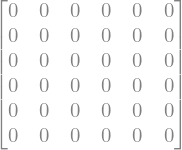

In [9]:
sym.simplify(sm.M-sm2.M)

In [10]:
sym.simplify(sm.f-sm2.f)

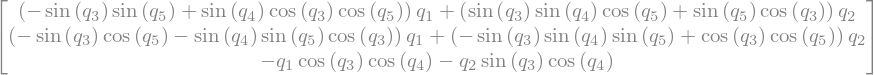

In [17]:
sym.simplify(body_frame.R.T*body_frame.t).diff(p.q[3])

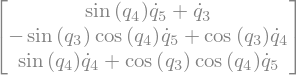

In [23]:
thetad = body_frame.theta.diff(me.dynamicsymbols._t)
body_frame.G*thetad-

In [18]:
sym.simplify(body_frame.R*Wedge3(body_frame.t)*body_frame.G)

NameError: name 'Wedge3' is not defined

In [ ]:
def Vee3(S):
    return sym.Matrix([S[2,1],S[0,2],S[1,0]])
def Wedge3(V):
    val = sym.Matrix([[0]*3]*3)
    val[0,1] = -V[2]
    val[1,0] = V[2]
    val[2,0] = -V[1]
    val[0,2] = V[1]
    val[1,2] = -V[0]
    val[2,1] = V[0]
    return val    

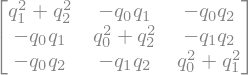

In [166]:
test = sym.Matrix(p.q[:3])
Wedge3(test).T*Wedge3(test)

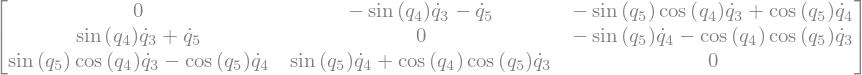

In [146]:
S = sym.simplify(body_frame.R.T*body_frame.R.diff(me.dynamicsymbols._t))
S

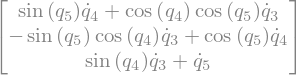

In [147]:
V = Vee3(S)
V

In [148]:
Gb = V.jacobian(p.qd[3:])

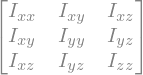

In [149]:
M[3:,3:]

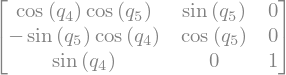

In [150]:
Gb

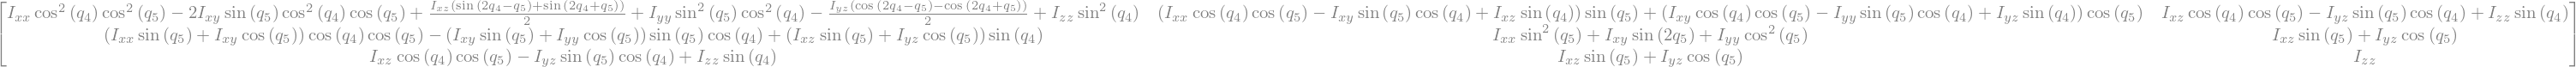

In [151]:
sym.simplify(Gb.T*M[3:,3:]*Gb)

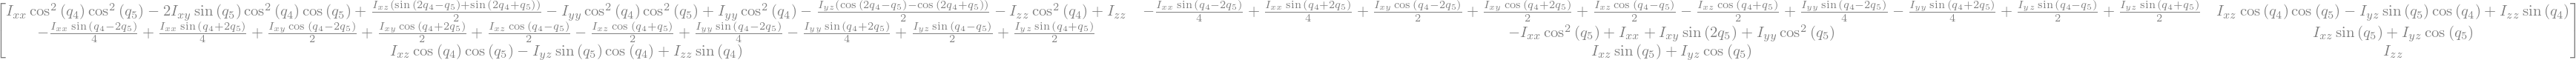

In [152]:
sym.simplify(sm.M[3:,3:])

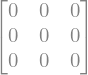

In [153]:
sym.simplify(sm.M[3:,3:]-Gb.T*M[3:,3:]*Gb)

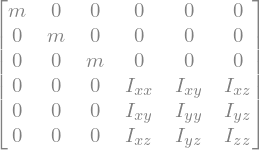

In [154]:
M

In [155]:
DoFs = 7

# heave and fold angle as degrres of freedom
p = ma.DynamicModelParameters(DoFs)

## pendulum mass
p.m = ma.ModelSymbol(value = 0.3,string = 'm')
p.I_xx = ma.ModelSymbol(value = 0.3,string = 'I_xx')
p.I_yy = ma.ModelSymbol(value = 0.3,string = 'I_yy')
p.I_zz = ma.ModelSymbol(value = 0.3,string = 'I_zz')
p.I_xy = ma.ModelSymbol(value = 0.3,string = 'I_xy')
p.I_xz = ma.ModelSymbol(value = 0.3,string = 'I_xz')
p.I_yz = ma.ModelSymbol(value = 0.3,string = 'I_yz')

#gravity vector
p.g  = ma.ModelSymbol(value = 9.81,string = 'g')                     # gravity
p.g_v = ma.ModelMatrix(value =[0,0,-1],length=3,string='g_v') # The stationary point

In [168]:
body_frame= ma.HomogenousTransform().Translate(*p.q[:3]).R_euler_params(p.q[3:])
#Create Elements
M = ele.MassMatrix(p.m,p.I_xx,p.I_yy,p.I_zz,p.I_xy,p.I_xz,p.I_yz)
body = ele.RigidElement(body_frame,M,gravityPotential=True)

In [172]:
o =body_frame.R.diff(me.dynamicsymbols._t)*body_frame.R

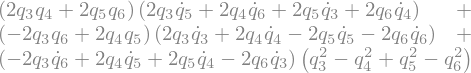

In [178]:
o[0,1]

In [ ]:
sm = ma.SymbolicModel.FromElementsAndForces(p,[body])

In [ ]:
sym.simplify(sm.M[1,1])

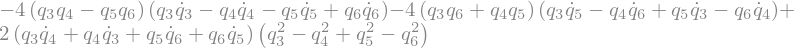

In [175]:
R = body_frame.R

om = R.diff(me.dynamicsymbols._t)*R.T
test = R.diff(me.dynamicsymbols._t)*R.T
sym.simplify(test[2,1])

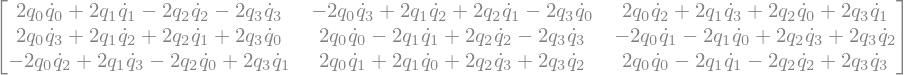

In [68]:
R.diff(me.dynamicsymbols._t)

In [63]:
c = p.q[3]**2+p.q[4]**2+p.q[5]**2+p.q[6]**2
c

In [64]:
c.diff(me.dynamicsymbols._t)

In [53]:
R2 = - c*sym.eye(3) + R
test = sym.simplify(R2.diff(me.dynamicsymbols._t)*R2.T)[1,1].expand()

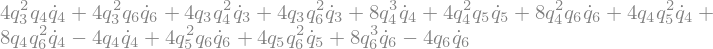

In [56]:
cc = p.q[3]**2+p.q[4]**2+p.q[5]**2+p.q[6]**2
ct = cc.diff(me.dynamicsymbols._t)
test.collect(ct)

In [57]:
ct

In [34]:
polysimp = lambda expr, eqs: sym.ratsimpmodprime(expr, sym.groebner(eqs).exprs)

In [36]:
polysimp(R[1,1],c)

TypeError: object of type 'Add' has no len()

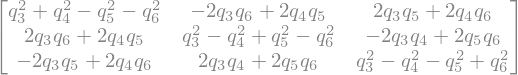

In [37]:
R